In [1]:
import numpy as np
import scipy as sp
from scipy.sparse import spdiags

from scipy.io import loadmat, savemat
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import cm


In [2]:
def burgers_model(N, L, freq, cubic = False, boundary="Dirichlet", init_cond="zero"):
    """
    Spatial discretization of 1-D viscous Burgers' equation
    with inputs and outputs

    Parameters
    ----------
    N
        -- number of nodes
    L
        -- Length of domain
    boundary
        -- Dirichlet (default) or Neumann
    init_cond
        -- zero (default) or non-zero

    Returns
    -------
    A
        -- Diffusion part
    f
        -- Ax@g(x)
    g
        -- g(x) = x^2
    u
        -- Input
    B,C
        -- Input, Output matrix
    x0
        -- initial condition
    """

    dx = L / (N + 1)  # spatial discretization length
    k = 1 / (dx**2)
    d = np.ones(N)

    # dz = L / (N + 1)
    z = np.linspace(0, 1, num=N + 2)

    A = spdiags([k * d, -2 * k * d, k * d], [-1, 0, 1], N, N, format="csc")
    Ax = spdiags(
        [(1 / (2 * dx)) * d, 0 * d, (-1 / (2 * dx)) * d], [-1, 0, 1], N, N, format="csc"
    )

    if boundary == "Neumann":
        A[-1, -1] = -k
        Ax[-1, -1] = -(1 / (2 * dx))

    if cubic:
        print('Cubic Burgers')
        g = lambda x: x**2
        f = lambda x: (0.5 * Ax @ g(x)) * (x**2) + (0.5 * Ax @ g(x))
    else:
        print('Quad Burgers')
        g = lambda x: x**2
        f = lambda x: 0.5 * Ax @ g(x)
        

    if init_cond == "non_zero":
        B = np.zeros((N,))
        
        x_func = lambda p: 10*(np.sin(1*freq*np.pi*(p))**2)*p*(1-p)
        x0 = x_func(z[1:-1]).T
        u = lambda t: 0.0
    else:
        B = np.ones((N,))
        x0 = np.zeros((N,))
        u = lambda t: 1.0

    C = np.zeros((1, N))
    C[:, -1] = 1

    return A, Ax, f, g, u, B, C, x0


In [3]:
L = 2.0
N = 256

Cubic Burgers
Cubic Burgers
Cubic Burgers
Cubic Burgers
Cubic Burgers
Cubic Burgers
Cubic Burgers
Cubic Burgers
Cubic Burgers
Cubic Burgers
Cubic Burgers
Cubic Burgers
Cubic Burgers


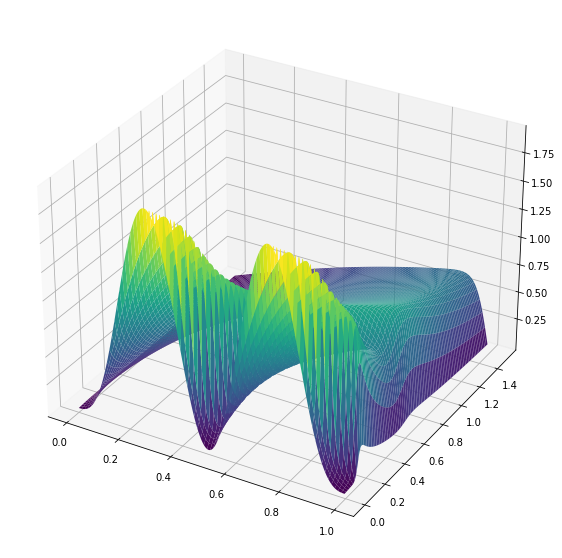

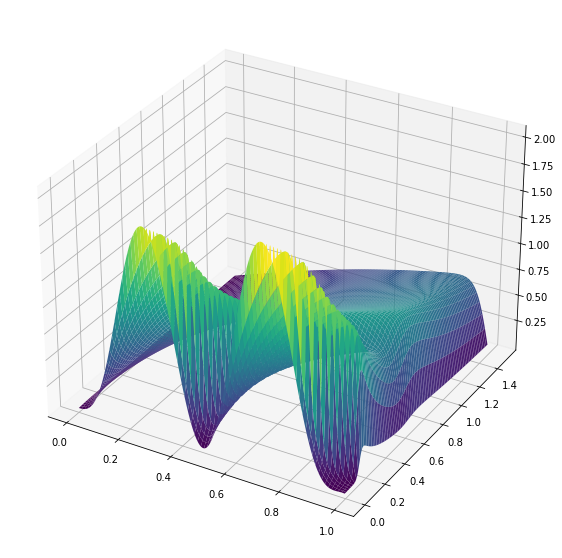

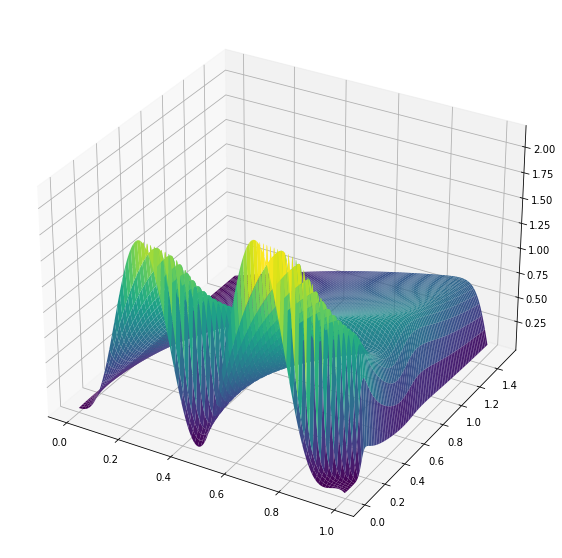

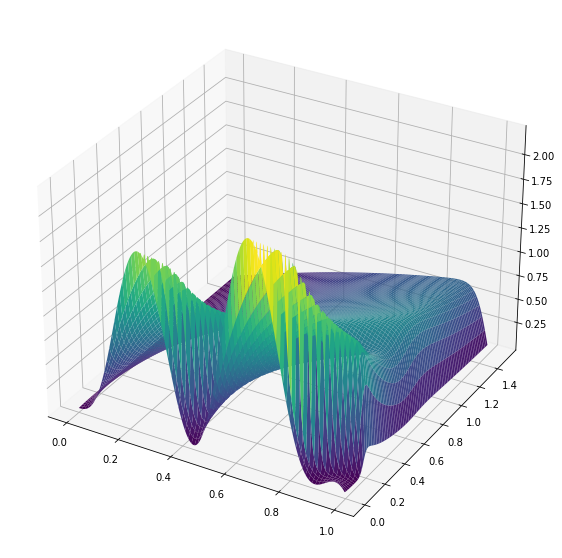

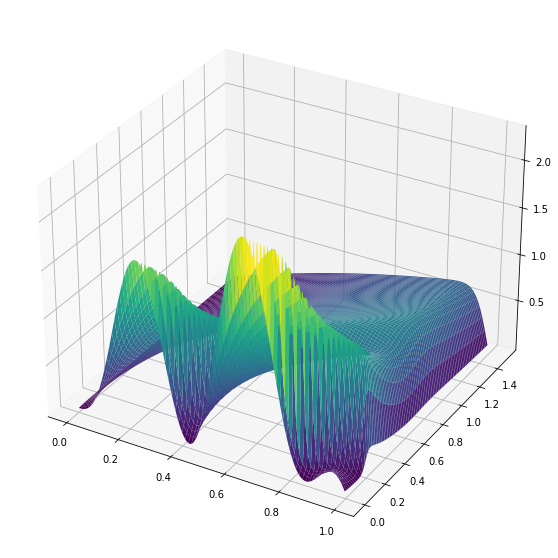

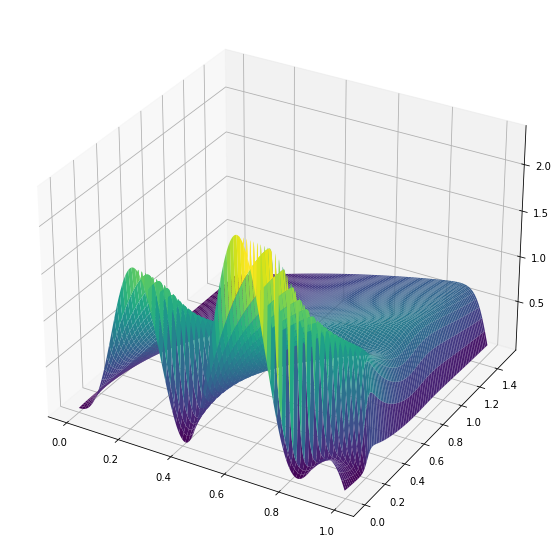

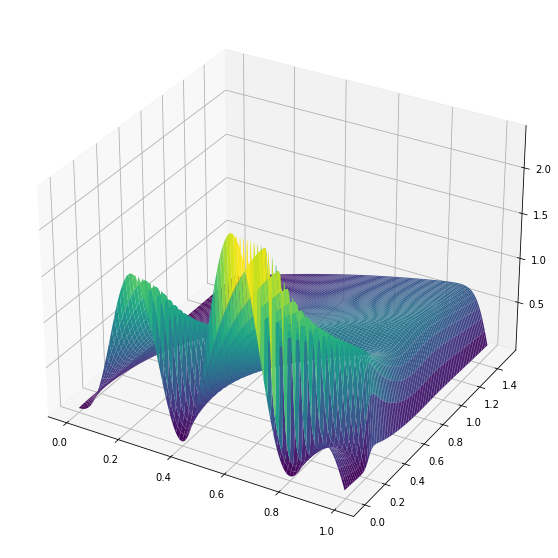

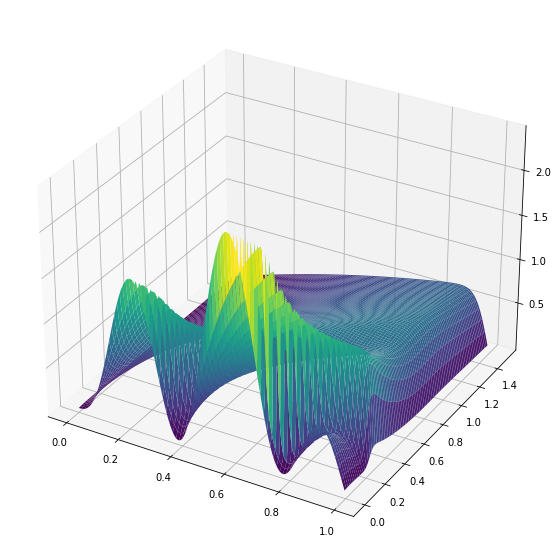

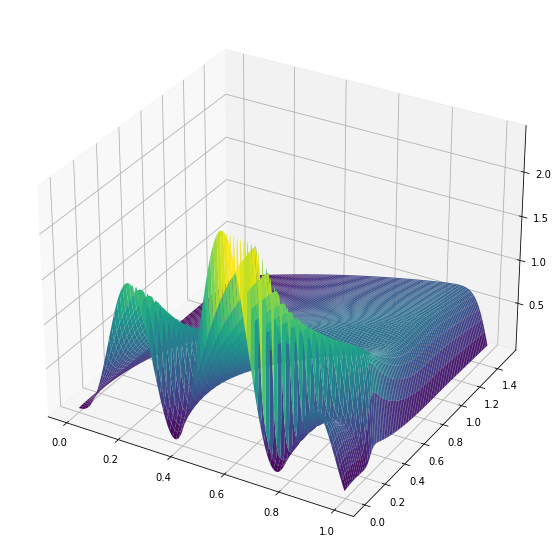

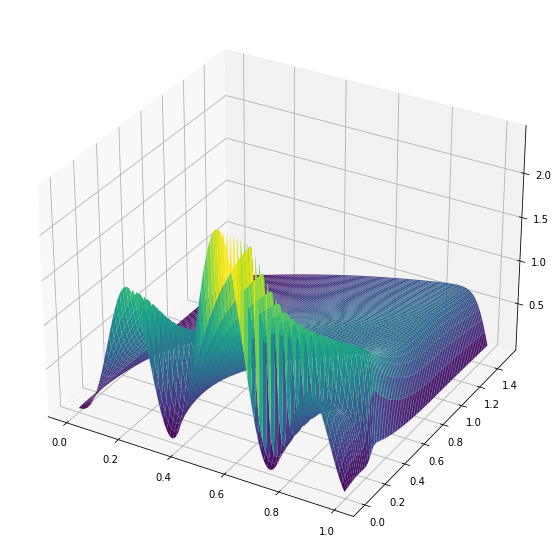

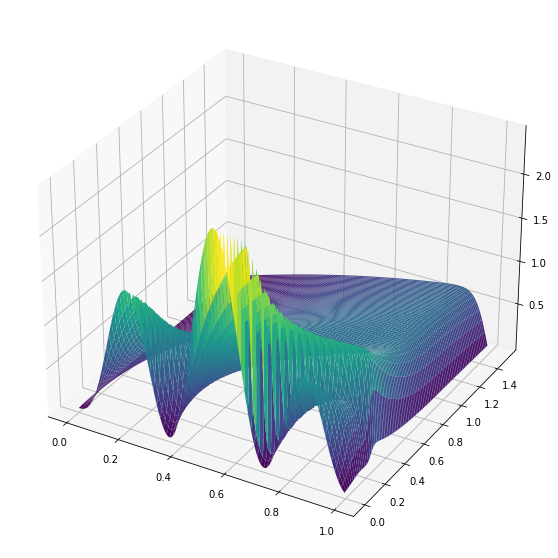

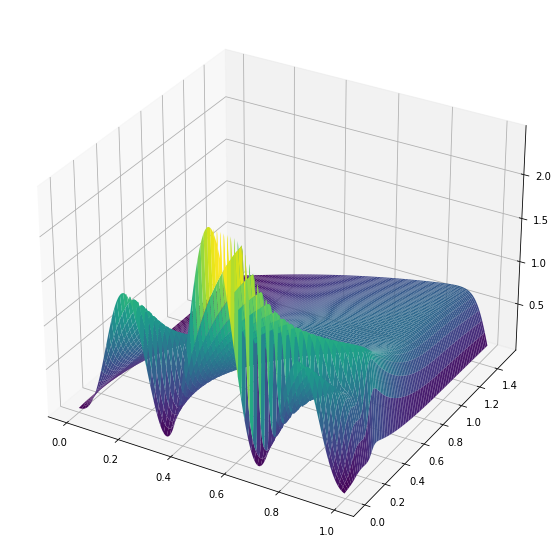

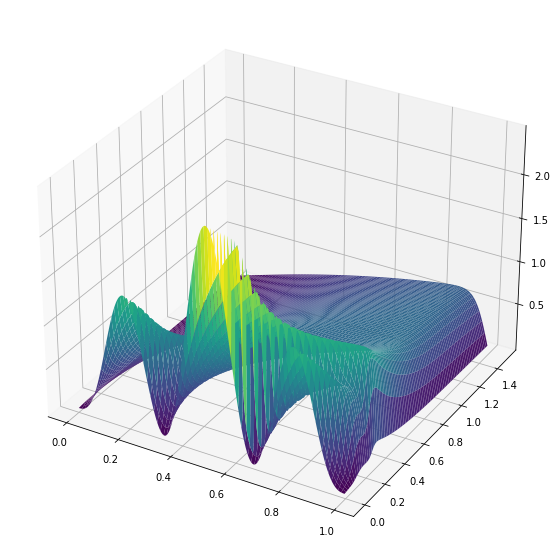

In [4]:
def model_burgers(t, x):
    return (0.05*A @ x) + f(x) 

x = np.random.randn(N,1)
t = np.linspace(0,1.5,1001)

space = np.arange(0, 1, 1 / N)
time = t
spacegrid, timegrid = np.meshgrid(space, time)


FREQ = np.linspace(2,3,13)
# FREQ = np.linspace(1.45,3,1)

X_data = np.zeros((len(FREQ), len(t), N))

for i, freq in enumerate(FREQ):
    (A, Ax, f, g, u, B, C, x0) = burgers_model(N, L, freq, init_cond = 'non_zero', cubic= True)
    sol = solve_ivp(model_burgers, [t[0], t[-1]], x0, t_eval=t)
    X_data[i] = sol.y.T


    fig, ax = plt.subplots(
        1, 1, figsize=(16, 10), subplot_kw={"projection": "3d"}
    )
    # Plot the surface.
    surf = ax.plot_surface(spacegrid, timegrid, sol.y.T, cmap=cm.viridis, rcount=100, ccount=100)
#     ax.view_init(elev=10., azim=45)



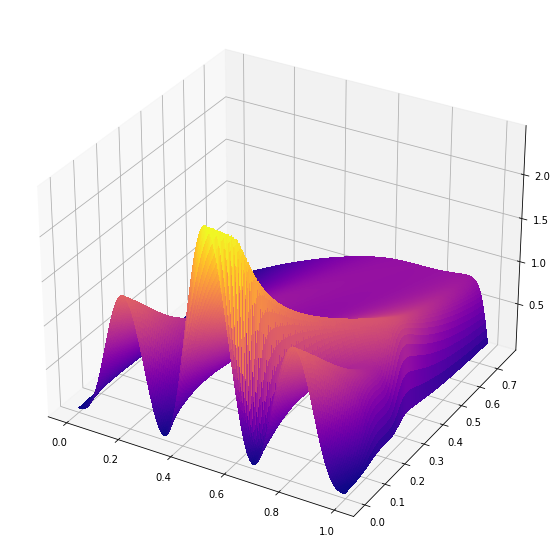

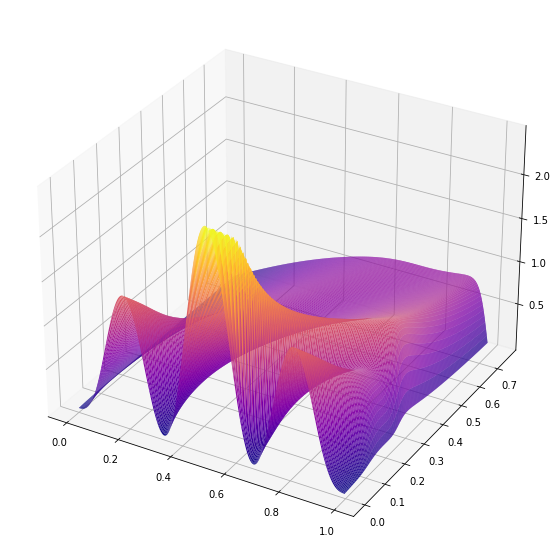

In [5]:
fig, ax = plt.subplots(
    1, 1, figsize=(16, 10), subplot_kw={"projection": "3d"}
)
# Plot the surface.
space_point = 501
# surf = ax.plot_surface(spacegrid[:space_point], timegrid[:space_point], sol.y.T[:space_point], cmap=cm.viridis, rcount=500, ccount=500)
surf = ax.plot_surface(spacegrid[:space_point], timegrid[:space_point], sol.y.T[:space_point], cmap=cm.plasma,antialiased=False,rcount=500, ccount=500)

fig, ax = plt.subplots(
    1, 1, figsize=(16, 10), subplot_kw={"projection": "3d"}
    
)
# Plot the surface.
space_point = 501
# surf = ax.plot_surface(spacegrid[:space_point], timegrid[:space_point], sol.y.T[:space_point], cmap=cm.viridis, rcount=500, ccount=500)
surf = ax.plot_surface(spacegrid[:space_point], timegrid[:space_point], sol.y.T[:space_point], cmap=cm.plasma,antialiased=True,rcount=500, ccount=500)

#     ax.view_init(elev=10., azim=45)

In [6]:
sol.y.shape, np.min(sol.y)

((256, 1001), 5.210207625091869e-05)

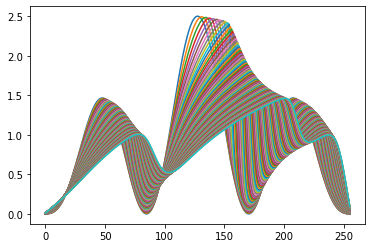

In [7]:
for i in range(0,100,1):
    plt.plot(sol.y[:,i])

In [8]:
# def model_burgers_quad(t, x):
#     return (0.1*A @ x) + f(x) 

# space = np.arange(0, 1, 1 / N)
# time = t
# spacegrid, timegrid = np.meshgrid(space, time)


# FREQ = np.linspace(1,3,7)

# X_data_b = np.zeros((len(FREQ), len(t), N))

# for i, freq in enumerate(FREQ):
#     (A, Ax, f, g, u, B, C, x0) = burgers_model(N, L, freq, init_cond = 'non_zero')
#     sol = solve_ivp(model_burgers_quad, [t[0], t[-1]], x0, t_eval=t)
#     X_data_b[i] = sol.y.T


#     fig, ax = plt.subplots(
#         1, 1, figsize=(16, 10), subplot_kw={"projection": "3d"}
#     )
#     # Plot the surface.
#     surf = ax.plot_surface(spacegrid, timegrid, sol.y.T, cmap=cm.viridis)
# #     ax.view_init(elev=10., azim=45)



In [9]:
# np.max(np.abs(X_data[0] -X_data_b[0]))

0.9591895680137459

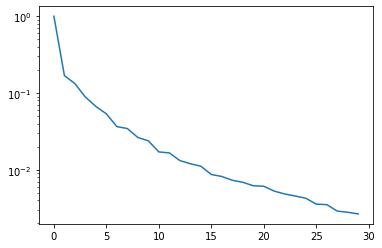

In [10]:
X_all = np.vstack(X_data).T
S = np.linalg.svd(X_all)[1]
r = 20
plt.semilogy(S[:30]/S[0])

sum(S[:r])/sum(S)

In [11]:
X_data.shape

(13, 1001, 256)

In [12]:
model_burgers(0,X_data[0][0]).shape

(256,)

In [13]:
dX_data = np.zeros_like(X_data)

for i in range(X_data.shape[0]):
    for j in range(X_data.shape[1]):
        dX_data[i][j] = model_burgers(0, X_data[i][j])
        

In [14]:
savemat('./Burgers_dirichilet_data.mat', {'X_data': X_data, 'dX_data': dX_data, 't': t, 'freq':freq})

In [15]:
# data = loadmat('./../Burger_data_init_condions.mat')
# data_dirichilet = loadmat('./../Burgers_dirichilet_data.mat')

In [16]:
# data['X_data'].shape, data_dirichilet['X_data'].shape

In [17]:
FREQ

array([2.        , 2.08333333, 2.16666667, 2.25      , 2.33333333,
       2.41666667, 2.5       , 2.58333333, 2.66666667, 2.75      ,
       2.83333333, 2.91666667, 3.        ])